In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('NIFTY 50 - Minute data 2015 to Aug 2024.csv')
df.index = pd.to_datetime(df['date'])

In [7]:
import mplfinance as mpf

In [8]:
# df.index.name = df.index.name.lower()
df.columns = df.columns.str.lower()

df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_name'] = df.index.day_name()
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['hour'] = df.index.hour
df['max'] = df[['open', 'high', 'low', 'close']].max(axis=1)
df['min'] = df[['open', 'high', 'low', 'close']].min(axis=1)
df['difference'] = df['max'] - df['min']
df['candle_body'] = df['open'] - df['close']
df['high_shadow'] = df['high'] - df['open']
df['low_shadow'] = df['close'] - df['low']
df['trend'] = df['candle_body'].apply(lambda x: "DOWN" if x < 0 else "ZERO" if x == 0 else "UP")

In [9]:
df.shape

(890511, 19)

In [10]:
df = df[df['year'] >= 2021]

In [11]:
import os

In [12]:
filtered_df = df.groupby(['year', 'month', 'day']).head(5)

In [13]:
filtered_df.head(10)

,date,open,high,low,close,volume,year,month,hour,day,day_name,minute,max,min,difference,candle_body,high_shadow,low_shadow,trend
date,,,,,,,,,,,,,,,,,,,
2021-01-01 09:15:00+05:30,2021-01-01 09:15:00+05:30,13996.10,14019.50,13994.85,14013.15,0,2021,1,9,1,Friday,15,14019.50,13994.85,24.65,-17.05,23.40,18.30,DOWN
2021-01-01 09:16:00+05:30,2021-01-01 09:16:00+05:30,14014.85,14018.55,14008.15,14009.05,0,2021,1,9,1,Friday,16,14018.55,14008.15,10.40,5.80,3.70,0.90,UP
2021-01-01 09:17:00+05:30,2021-01-01 09:17:00+05:30,14008.05,14013.10,14005.05,14012.70,0,2021,1,9,1,Friday,17,14013.10,14005.05,8.05,-4.65,5.05,7.65,DOWN
2021-01-01 09:18:00+05:30,2021-01-01 09:18:00+05:30,14013.65,14019.10,14013.65,14016.20,0,2021,1,9,1,Friday,18,14019.10,14013.65,5.45,-2.55,5.45,2.55,DOWN
2021-01-01 09:19:00+05:30,2021-01-01 09:19:00+05:30,14015.45,14017.80,14011.95,14015.45,0,2021,1,9,1,Friday,19,14017.80,14011.95,5.85,0.00,2.35,3.50,ZERO
2021-01-04 09:15:00+05:30,2021-01-04 09:15:00+05:30,14104.35,14106.40,14091.65,14097.10,0,2021,1,9,4,Monday,15,14106.40,14091.65,14.75,7.25,2.05,5.45,UP
2021-01-04 09:16:00+05:30,2021-01-04 09:16:00+05:30,14097.55,14099.85,14088.85,14089.85,0,2021,1,9,4,Monday,16,14099.85,14088.85,11.00,7.70,2.30,1.00,UP
2021-01-04 09:17:00+05:30,2021-01-04 09:17:00+05:30,14087.20,14089.15,14080.60,14082.50,0,2021,1,9,4,Monday,17,14089.15,14080.60,8.55,4.70,1.95,1.90,UP
2021-01-04 09:18:00+05:30,2021-01-04 09:18:00+05:30,14083.25,14088.60,14082.50,14086.85,0,2021,1,9,4,Monday,18,14088.60,14082.50,6.10,-3.60,5.35,4.35,DOWN


In [14]:
# import pandas as pd

# # Sample DataFrame
# data = {
#     'A': [1, 2],
#     'B': ['a', 'b'],
#     'C': [True, False]
# }

# df = pd.DataFrame(data)

# # Melting the DataFrame
# melted = df.melt(value_name='Value')
# x = [1,2,3,4]
# print(melted)
# print(type(melted))
# print(type(melted['Value']))
# x.append(melted['Value'].)

# print(x)


In [15]:
df_5_min = pd.DataFrame()

for i in range(0, len(filtered_df), 5):
    # Iterate in steps of 5
    # continue
    stack = []
    df_chunk = filtered_df.iloc[i:i+5] # Get 5 rows in each iteration
    stack.extend(df_chunk['open'].to_list())
    stack.extend(df_chunk['high'].to_list())
    stack.extend(df_chunk['low'].to_list())
    stack.extend(df_chunk['close'].to_list())

    ohlc_data = pd.DataFrame({
    'high' : [max(stack)],
    'low' : [min(stack)],
    'open' : [df_chunk.iloc[0].open],
    'close' : [df_chunk.iloc[-1].close],
    'year': [df_chunk.iloc[0].year],
    'month': [df_chunk.iloc[0].month],
    'day': [df_chunk.iloc[0].day],
    'hour': [df_chunk.iloc[0].hour],
    'minute': [df_chunk.iloc[0].minute],
    })

    ohlc_data.index = pd.to_datetime([f"{int(df_chunk.iloc[-1].year)}-{int(df_chunk.iloc[-1].month)}-{int(df_chunk.iloc[-1].day)}"])
    df_5_min = pd.concat([df_5_min, ohlc_data])

In [16]:
df_5_min.head(10)
df_5_min['year'] = df_5_min['year'].astype(int)
df_5_min['month'] = df_5_min['month'].astype(int)
df_5_min['day'] = df_5_min['day'].astype(int)

In [17]:
# for index, row in df_5_min.iterrows():
# # Plot candlestick chart
#     directory_path = f"{os.getcwd()}/{int(row['year'])}_{int(row['month'])}/ohh_analysis"
#     if not os.path.exists(directory_path):
#         os.makedirs(directory_path)
    
#     # Create a DataFrame with OHLC data for a single day
#     ohlc_data = pd.DataFrame({
#         'Open': [row['open']],
#         'High': [row['high']],
#         'Low': [row['low']],
#         'Close': [row['close']],
#     }, index=[pd.Timestamp(f"10-08-2005")])
    

#     mpf.plot(ohlc_data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price', savefig=os.path.join(directory_path,str(int(row['day']))))

In [18]:
df_5_min['candle_body'] = df_5_min['open'] - df_5_min['close']
df_5_min['high_shadow'] = df_5_min['high'] - df_5_min['open']
df_5_min['low_shadow'] = df_5_min['close'] - df_5_min['low']
df_5_min['my_candle'] = df_5_min['low'] - df_5_min['open']
df_5_min['trend'] = df_5_min['candle_body'].apply(lambda x: "DOWN" if x < 0 else "ZERO" if x == 0 else "UP")
df_5_min['my_trend'] = df_5_min['my_candle'].apply(lambda x: "YES" if x < 0 else "YES" if x == 0 else "NO")
trend_counts = df_5_min['trend'].value_counts()
my_trend_counts = df_5_min['my_trend'].value_counts()

In [19]:
trend_counts

trend
UP      513
DOWN    393
Name: count, dtype: int64

In [20]:
my_trend_counts

my_trend
YES    906
Name: count, dtype: int64

In [21]:
monthly_wise_trend = df_5_min.groupby(['year','month'])['trend'].value_counts()

In [22]:
monthly_wise_trend.to_dict()

{(2021, 1, 'UP'): 13,
 (2021, 1, 'DOWN'): 7,
 (2021, 2, 'DOWN'): 11,
 (2021, 2, 'UP'): 9,
 (2021, 3, 'UP'): 14,
 (2021, 3, 'DOWN'): 7,
 (2021, 4, 'DOWN'): 11,
 (2021, 4, 'UP'): 8,
 (2021, 5, 'DOWN'): 12,
 (2021, 5, 'UP'): 8,
 (2021, 6, 'UP'): 14,
 (2021, 6, 'DOWN'): 8,
 (2021, 7, 'UP'): 13,
 (2021, 7, 'DOWN'): 8,
 (2021, 8, 'DOWN'): 11,
 (2021, 8, 'UP'): 10,
 (2021, 9, 'DOWN'): 11,
 (2021, 9, 'UP'): 10,
 (2021, 10, 'UP'): 12,
 (2021, 10, 'DOWN'): 8,
 (2021, 11, 'UP'): 11,
 (2021, 11, 'DOWN'): 9,
 (2021, 12, 'DOWN'): 12,
 (2021, 12, 'UP'): 11,
 (2022, 1, 'DOWN'): 10,
 (2022, 1, 'UP'): 10,
 (2022, 2, 'DOWN'): 10,
 (2022, 2, 'UP'): 10,
 (2022, 3, 'UP'): 11,
 (2022, 3, 'DOWN'): 10,
 (2022, 4, 'DOWN'): 10,
 (2022, 4, 'UP'): 9,
 (2022, 5, 'UP'): 11,
 (2022, 5, 'DOWN'): 10,
 (2022, 6, 'DOWN'): 13,
 (2022, 6, 'UP'): 9,
 (2022, 7, 'DOWN'): 13,
 (2022, 7, 'UP'): 8,
 (2022, 8, 'UP'): 11,
 (2022, 8, 'DOWN'): 9,
 (2022, 9, 'DOWN'): 12,
 (2022, 9, 'UP'): 10,
 (2022, 10, 'DOWN'): 11,
 (2022, 10, 'UP'

In [23]:
year_2024 = df_5_min[df_5_min['year']==2024]['my_candle'].value_counts()

In [24]:
sorted_dict_desc = dict(sorted(year_2024.items(), reverse=True))
print(sorted_dict_desc)

{0.0: 4, -0.2000000000007276: 1, -0.25: 1, -0.3499999999985448: 1, -0.3500000000021828: 1, -0.4500000000007276: 1, -0.5: 1, -0.5499999999992724: 1, -0.75: 1, -1.1000000000021828: 1, -2.150000000001455: 1, -2.25: 1, -3.149999999997817: 1, -3.5: 1, -4.350000000002183: 1, -4.549999999999272: 1, -4.599999999998545: 1, -5.400000000001455: 1, -5.5: 1, -6.75: 1, -7.049999999999272: 1, -7.399999999997817: 1, -7.549999999999272: 1, -7.850000000002183: 1, -8.600000000002183: 1, -8.94999999999709: 1, -9.150000000001455: 1, -10.299999999999272: 1, -10.399999999997817: 1, -11.049999999999272: 1, -11.099999999998545: 1, -11.25: 1, -11.450000000000728: 1, -11.650000000001455: 2, -11.849999999998545: 1, -12.44999999999709: 1, -13.950000000000728: 1, -14.0: 1, -15.25: 1, -16.049999999999272: 1, -16.150000000001455: 1, -17.149999999997817: 1, -17.850000000002183: 1, -17.900000000001455: 1, -19.0: 1, -19.099999999998545: 1, -19.650000000001455: 1, -19.799999999999272: 1, -19.849999999998545: 1, -20.20000

In [25]:
# df_5_min[df_5_min['year']==2024][df_5_min['month']==8]

In [26]:
# df_5 = pd.read_csv('../nifty_ohlc/nifty_5m_august_2024.csv')
# df_5

In [27]:
import statistics

In [28]:
data = list(year_2024.keys())

mean_value = statistics.mean(data)

# Median
median_value = statistics.median(data)

# Mode
mode_value = statistics.mode(data)


In [29]:
mean_value

-39.411217948717955

In [30]:
median_value

-33.774999999999636

In [31]:
mode_value

0.0

In [32]:
data.sort()

In [33]:
len(data)

156

In [34]:
import matplotlib.pyplot as plt

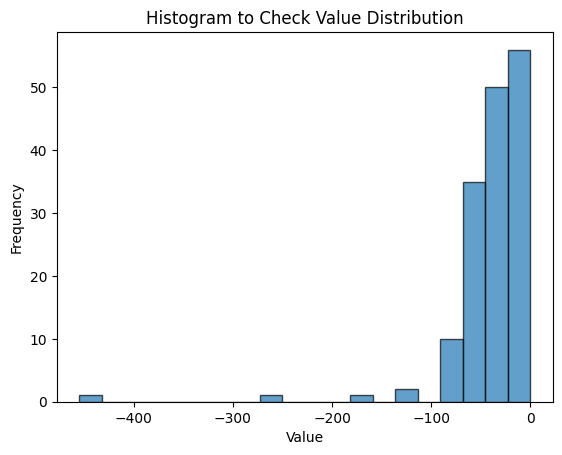

In [35]:
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram to Check Value Distribution')

# Show the plot
plt.show()

In [36]:
filtered_data = list(filter(lambda x: x >= -100, data))

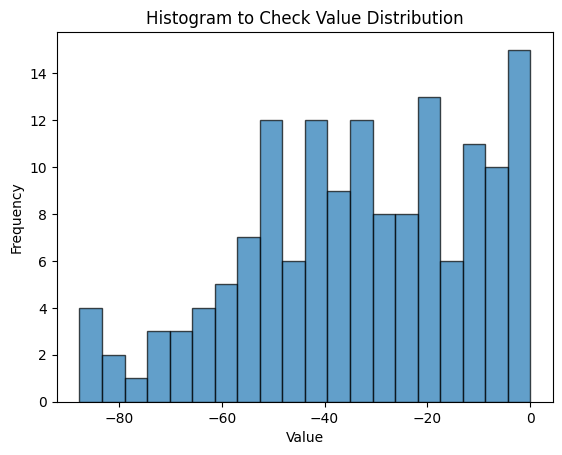

In [37]:
plt.hist(filtered_data, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram to Check Value Distribution')

# Show the plot
plt.show()